In [1]:

import sklearn
import tensorflow as tf
import numpy as np
import matplotlib.image as mpi
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers, models, datasets
import os
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split

In [2]:
#SE IMPORTA EL DATASET DEL CSV COMO UN DATAFRAME DE PANDAS
dataset = pd.read_csv('dataset.csv')
dataset.drop(dataset[dataset.type!='PHOTO'].index, inplace=True)
print(dataset.duplicated().sum())
dataset = dataset.drop_duplicates()
dataset
print(dataset.duplicated().sum())
dataset = dataset.set_index('cid')
dataset['id'] = dataset.index
dataset

47
0


,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id
cid,,,,,,,,,,,,,,,
QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,SWAP.HIVE,PHOTO,2,False,30,2020,1,0,./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...,QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH
QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,SWAP.HIVE,PHOTO,0,True,2,2021,1,0,./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...,QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4
QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...,QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN
QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w,Dream World,I found colors in my sky,yoslehz,yoslehz_dream-world_i-found-colors-in-my-sky,20.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,./dataset/image/QmT36BPdeJWNEdUr566z4DYGWxXqrD...,QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w
QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c,experimental,Angela 👼,elias15g,elias15g_experimental_angela-,35.0,SWAP.HIVE,PHOTO,3,False,5,2020,1,0,./dataset/image/QmWQGXNu47pecHGfEatd3ATakphq5z...,QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmVp9RRbH89MGhJA9xMvDSwmwEVB7N2FFZwBxzZJHmXmVa,Leaf Art,Frontliners Leaf Art,sucal,sucal_leaf-art_frontliners-leaf-art,30.0,SWAP.HIVE,PHOTO,0,False,7,2020,3,0,./dataset/image/QmVp9RRbH89MGhJA9xMvDSwmwEVB7N...,QmVp9RRbH89MGhJA9xMvDSwmwEVB7N2FFZwBxzZJHmXmVa
Qmb4w4VqJWkWVGveh49cPixAfXNEASYTswVjso2HB7v4eU,:: NFT SERENITY ::,CRUISIN' TO THE MOON..,selectors,selectors_-nft-serenity-_cruisin-to-the-moon,10.0,SWAP.HIVE,PHOTO,0,False,3,2020,1,0,./dataset/image/Qmb4w4VqJWkWVGveh49cPixAfXNEAS...,Qmb4w4VqJWkWVGveh49cPixAfXNEASYTswVjso2HB7v4eU
QmTAfd3aMsHfdN5Rg1A3brK12LQDuVkPznZyW44eFRKvj4,Oil painting style pieces,Easy apocalypse,federacion45,federacion45_oil-painting-style-pieces_easy-ap...,60.0,SWAP.HIVE,PHOTO,0,False,2,2020,3,0,./dataset/image/QmTAfd3aMsHfdN5Rg1A3brK12LQDuV...,QmTAfd3aMsHfdN5Rg1A3brK12LQDuVkPznZyW44eFRKvj4


In [3]:
#SE IMPORTA EL DATASET DEL CSV COMO UN DATAFRAME DE PANDAS

lista = os.listdir('image')
list=[]
for x in lista:
    x = x.split('.')
    x = x[0]
    list.append(x)
for j in dataset['id']:
        print(j)
        if j not in list:
            dataset.drop(j, axis=0, inplace=True)
        print(len(dataset))

QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH
3024
QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4
3024
QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN
3024
QmT36BPdeJWNEdUr566z4DYGWxXqrDSeoA7zCHbKw8528w
3024
QmWQGXNu47pecHGfEatd3ATakphq5zXVrzs5unYYK4VR1c
3024
Qma6eHAWkXhrkHsfCHrYJNkuPoUAFrSjg2a6Xk2sCM7CBd
3024
QmeTAUBQUoqekVQBhEFqdCSAjCVX9ShTALx58w74mscf1a
3024
QmUmwLohsrgjHac27XQ7eWCkLS4VP35uUtT4jLqyo4rMyX
3024
QmWSozMKfzNE43WoAmcf5QdL3ptrmBTPJdxPxeggojeMdT
3024
QmfDRZnYUtM96U8AgNbS9bqgpahvPSDrXs2vhfsJKK1PD5
3024
QmSuqPZsf9xxcEkdDQpcNnJ5HZC3tacwsmPtmkrZ97LL8a
3024
QmbJ5uAYt3PDjEHZNoodeyjpPM7CPp93aTWT3SshbS5YFa
3024
QmaWvdqVZQeQXqSfR1HwPgWUUp1rfvDCQKvcc3gouhfbRm
3024
QmaDVBjsjmpPwHun3SCL9HGRjem5uZmoJgmCqdN13wVxrt
3024
QmNiRqeW84jnEbN8wVCcsyXc8f6HgX5aHEScBaTkqWmvpp
3024
QmeddHYx6UDmTRRLDdCYmzVK4VjRGQ1qNd2ooFzGPVbmFh
3024
QmQWykiSvoYKtTM1SznM4aDGNmciiRLEWNkCEoP2L8zR65
3024
QmaM1zTWoiYwT5L4BNcaaRnB56ueaiXLZpPWSKzJVQr2Pu
3024
QmU1kCAghsy5DCaWP79atdRzYDhvAYddFvVbuLPK4hAxUy
3024
QmQ9zjvq63yt

In [4]:
fotos = dataset.loc[dataset['type'] == 'PHOTO']
fotos = fotos.loc[fotos['year']>=2014]
fotos.loc[fotos['id']=='Qma1SmtDeCDU9yqQe5VGTtx6Z5ncdXWAtN1LoP7eqEzWh8']['price']
fotos.drop(fotos[fotos['price']>350].index,inplace=True)
ism=fotos.loc[:,'price']==350
fotos['price'].loc[ism]=349.99 
#plt.hist(fotos['price'])
print(fotos['price'].describe())
fotos_train, fotos_test= train_test_split(fotos,  test_size=.3,  random_state=500)
fotos_train

count    2658.000000
mean       77.958636
std        73.830154
min         2.500000
25%        25.000000
50%        50.000000
75%       100.000000
max       349.990000
Name: price, dtype: float64


c:\Users\juand\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id
cid,,,,,,,,,,,,,,,
QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp5UYZ8rGLAQwakctq,Physical Gallery,Torn Between Red and Blue,tych021,tych021_physical-gallery_torn-between-red-and-...,35.0,SWAP.HIVE,PHOTO,2,False,5,2021,1,0,./dataset/image/QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp...,QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp5UYZ8rGLAQwakctq
QmNazUDbRovKyr7aHVC5YnQXE1K6XE8Civm9Qp22HBD9Dh,painting,Sovereignty,viralnft,viralnft_painting_sovereignty,100.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,./dataset/image/QmNazUDbRovKyr7aHVC5YnQXE1K6XE...,QmNazUDbRovKyr7aHVC5YnQXE1K6XE8Civm9Qp22HBD9Dh
QmeJbXg1fRY69WKzMbYxH6j78GzbFuqjR8KVKn7Wf5adfo,Sketching in a sketchbook. parrot,Sketching in a sketchbook. parrot,elenasteem,elenasteem_sketching-in-a-sketchbook-parrot_sk...,40.0,SWAP.HIVE,PHOTO,0,False,2,2019,1,0,./dataset/image/QmeJbXg1fRY69WKzMbYxH6j78GzbFu...,QmeJbXg1fRY69WKzMbYxH6j78GzbFuqjR8KVKn7Wf5adfo
QmZtdkhheBVfH8dSdkrgcktTVaQDPm9kP79ExjZdgkbxBT,Sexy pig,Sexy pig,yakubenko,yakubenko_sexy-pig_sexy-pig,70.0,SWAP.HIVE,PHOTO,1,False,1,2018,1,0,./dataset/image/QmZtdkhheBVfH8dSdkrgcktTVaQDPm...,QmZtdkhheBVfH8dSdkrgcktTVaQDPm9kP79ExjZdgkbxBT
QmVSfddBP38Uxsm36PtTpGd4reWFFgqWg2FYVRzdPeBvoV,Poetic paths,Adrenaline,rodrigocairo,rodrigocairo_poetic-paths_adrenaline,10.0,SWAP.HIVE,PHOTO,1,False,5,2021,1,0,./dataset/image/QmVSfddBP38Uxsm36PtTpGd4reWFFg...,QmVSfddBP38Uxsm36PtTpGd4reWFFgqWg2FYVRzdPeBvoV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmeMx1dZvyYQtYezDHRVzPSArCfBfn35QowEf1ZYXwdqzs,80's childhood,Young J,ibentmywookiee,ibentmywookiee_80s-childhood_young-j,260.0,SWAP.HIVE,PHOTO,0,False,1,2021,1,0,./dataset/image/QmeMx1dZvyYQtYezDHRVzPSArCfBfn...,QmeMx1dZvyYQtYezDHRVzPSArCfBfn35QowEf1ZYXwdqzs
QmYHu7WWN5KZTDCqyunTzsVuMKnhjgLzxwyQBytifcSZfC,Dragon shadow,Dragon shadow,pollyfoxxy,pollyfoxxy_dragon-shadow_dragon-shadow,24.0,SWAP.HIVE,PHOTO,0,False,5,2019,1,0,./dataset/image/QmYHu7WWN5KZTDCqyunTzsVuMKnhjg...,QmYHu7WWN5KZTDCqyunTzsVuMKnhjgLzxwyQBytifcSZfC
QmNpUMFwzMJod2Nnsg6skGcm7e8LBU2Sh3FgidPBGNGtCG,Recovered Art,Almost Abstract,bflanagin,bflanagin_recovered-art_almost-abstract,4.0,SWAP.HIVE,PHOTO,0,True,35,2015,1,0,./dataset/image/QmNpUMFwzMJod2Nnsg6skGcm7e8LBU...,QmNpUMFwzMJod2Nnsg6skGcm7e8LBU2Sh3FgidPBGNGtCG


In [5]:
#FUNCIÓN PARA CONVERTIR RGBA A RGB PARA FORMATOS DE PNG
def load_image_into_numpy_array(image):
    # The function supports only grayscale images
    last_axis = -1
    dim_to_repeat = 2
    repeats = 3
    grscale_img_3dims = np.expand_dims(image, last_axis)
    training_image = np.repeat(grscale_img_3dims, repeats, dim_to_repeat).astype('uint8')
    assert len(training_image.shape) == 3
    assert training_image.shape[-1] == 3
    return training_image

In [6]:
fotos_train['id'] = fotos_train.index
fotos_train

<ipython-input-6-e260e8553638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fotos_train['id'] = fotos_train.index


,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id
cid,,,,,,,,,,,,,,,
QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp5UYZ8rGLAQwakctq,Physical Gallery,Torn Between Red and Blue,tych021,tych021_physical-gallery_torn-between-red-and-...,35.0,SWAP.HIVE,PHOTO,2,False,5,2021,1,0,./dataset/image/QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp...,QmdSg1aPNCurDuyVRWqvJ7Zuy3q7gp5UYZ8rGLAQwakctq
QmNazUDbRovKyr7aHVC5YnQXE1K6XE8Civm9Qp22HBD9Dh,painting,Sovereignty,viralnft,viralnft_painting_sovereignty,100.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,./dataset/image/QmNazUDbRovKyr7aHVC5YnQXE1K6XE...,QmNazUDbRovKyr7aHVC5YnQXE1K6XE8Civm9Qp22HBD9Dh
QmeJbXg1fRY69WKzMbYxH6j78GzbFuqjR8KVKn7Wf5adfo,Sketching in a sketchbook. parrot,Sketching in a sketchbook. parrot,elenasteem,elenasteem_sketching-in-a-sketchbook-parrot_sk...,40.0,SWAP.HIVE,PHOTO,0,False,2,2019,1,0,./dataset/image/QmeJbXg1fRY69WKzMbYxH6j78GzbFu...,QmeJbXg1fRY69WKzMbYxH6j78GzbFuqjR8KVKn7Wf5adfo
QmZtdkhheBVfH8dSdkrgcktTVaQDPm9kP79ExjZdgkbxBT,Sexy pig,Sexy pig,yakubenko,yakubenko_sexy-pig_sexy-pig,70.0,SWAP.HIVE,PHOTO,1,False,1,2018,1,0,./dataset/image/QmZtdkhheBVfH8dSdkrgcktTVaQDPm...,QmZtdkhheBVfH8dSdkrgcktTVaQDPm9kP79ExjZdgkbxBT
QmVSfddBP38Uxsm36PtTpGd4reWFFgqWg2FYVRzdPeBvoV,Poetic paths,Adrenaline,rodrigocairo,rodrigocairo_poetic-paths_adrenaline,10.0,SWAP.HIVE,PHOTO,1,False,5,2021,1,0,./dataset/image/QmVSfddBP38Uxsm36PtTpGd4reWFFg...,QmVSfddBP38Uxsm36PtTpGd4reWFFgqWg2FYVRzdPeBvoV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmeMx1dZvyYQtYezDHRVzPSArCfBfn35QowEf1ZYXwdqzs,80's childhood,Young J,ibentmywookiee,ibentmywookiee_80s-childhood_young-j,260.0,SWAP.HIVE,PHOTO,0,False,1,2021,1,0,./dataset/image/QmeMx1dZvyYQtYezDHRVzPSArCfBfn...,QmeMx1dZvyYQtYezDHRVzPSArCfBfn35QowEf1ZYXwdqzs
QmYHu7WWN5KZTDCqyunTzsVuMKnhjgLzxwyQBytifcSZfC,Dragon shadow,Dragon shadow,pollyfoxxy,pollyfoxxy_dragon-shadow_dragon-shadow,24.0,SWAP.HIVE,PHOTO,0,False,5,2019,1,0,./dataset/image/QmYHu7WWN5KZTDCqyunTzsVuMKnhjg...,QmYHu7WWN5KZTDCqyunTzsVuMKnhjgLzxwyQBytifcSZfC
QmNpUMFwzMJod2Nnsg6skGcm7e8LBU2Sh3FgidPBGNGtCG,Recovered Art,Almost Abstract,bflanagin,bflanagin_recovered-art_almost-abstract,4.0,SWAP.HIVE,PHOTO,0,True,35,2015,1,0,./dataset/image/QmNpUMFwzMJod2Nnsg6skGcm7e8LBU...,QmNpUMFwzMJod2Nnsg6skGcm7e8LBU2Sh3FgidPBGNGtCG


In [7]:
fotos_test['id'] = fotos_test.index
fotos_test

<ipython-input-7-02aba4596cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fotos_test['id'] = fotos_test.index


,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,path,id
cid,,,,,,,,,,,,,,,
QmcuCtKcYZaUP7ks8F2B2bui5bcS44X5pUoEYfE2Sda71C,Glitch,Walk of the Elephants,freakjesus,freakjesus_glitch_walk-of-the-elephants,160.0,SWAP.HIVE,PHOTO,0,False,1,2021,3,0,./dataset/image/QmcuCtKcYZaUP7ks8F2B2bui5bcS44...,QmcuCtKcYZaUP7ks8F2B2bui5bcS44X5pUoEYfE2Sda71C
QmaRX1Wy6YMtB7hBLCXmebCKi1sCn2MeNYw6zUzKcjou71,Crypto,LITECOIN L.A. CRYPTOART NFT 4,vikisecrets,vikisecrets_crypto_litecoin-la-cryptoart-nft-4,39.0,SWAP.HIVE,PHOTO,0,False,4,2020,3,0,./dataset/image/QmaRX1Wy6YMtB7hBLCXmebCKi1sCn2...,QmaRX1Wy6YMtB7hBLCXmebCKi1sCn2MeNYw6zUzKcjou71
QmSxVizLwKWonH76veDceaSQYFZSdQkvNHQKgk99piKGq6,Creepy,Happy Autopsy,shirahoshi,shirahoshi_creepy_happy-autopsy,30.0,SWAP.HIVE,PHOTO,0,False,4,2020,3,0,./dataset/image/QmSxVizLwKWonH76veDceaSQYFZSdQ...,QmSxVizLwKWonH76veDceaSQYFZSdQkvNHQKgk99piKGq6
QmUzgbufmcvo6GiFLKSfPnhJo9uYfk2C5u99JAdhYkjc6v,Nightmare Heroes,Nightmare Hero #2,sarahstudio,sarahstudio_nightmare-heroes_nightmare-hero-2,55.0,SWAP.HIVE,PHOTO,0,False,5,2021,1,0,./dataset/image/QmUzgbufmcvo6GiFLKSfPnhJo9uYfk...,QmUzgbufmcvo6GiFLKSfPnhJo9uYfk2C5u99JAdhYkjc6v
QmWArDNV9y49QPd37JRfLM9A6Ks6JANH9vVEZ4b8kiyruq,The fish that ate the world,the fish that ate the world,artxmike,artxmike_the-fish-that-ate-the-world_the-fish-...,45.0,SWAP.HIVE,PHOTO,1,False,5,2020,1,0,./dataset/image/QmWArDNV9y49QPd37JRfLM9A6Ks6JA...,QmWArDNV9y49QPd37JRfLM9A6Ks6JANH9vVEZ4b8kiyruq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QmQure5JCR6Jquvrcf44tESDkBVaiUG8B267MNryZXTT68,People with Jonathan,Reign-bow Eyes,jonamccallum,jonamccallum_people-with-jonathan_reign-bow-eyes,25.0,SWAP.HIVE,PHOTO,1,False,3,2021,1,0,./dataset/image/QmQure5JCR6Jquvrcf44tESDkBVaiU...,QmQure5JCR6Jquvrcf44tESDkBVaiUG8B267MNryZXTT68
QmdncRN6L8NJNwHEnm1UxbfByz1pmzqu9KqKoFrP578h2U,Hivelander The Immortal Mannequin,Mannefish's dream,hivelander,hivelander_hivelander-the-immortal-mannequin_m...,108.0,SWAP.HIVE,PHOTO,0,False,1,2020,1,0,./dataset/image/QmdncRN6L8NJNwHEnm1UxbfByz1pmz...,QmdncRN6L8NJNwHEnm1UxbfByz1pmzqu9KqKoFrP578h2U
QmYZjgNBcWnCUv89CpsAekS3CPxRqq66hJyKidgZcEar8e,REKT,PixeLincoln,rektdoteth,rektdoteth_rekt_pixelincoln,30.0,SWAP.HIVE,PHOTO,0,False,1,2020,1,0,./dataset/image/QmYZjgNBcWnCUv89CpsAekS3CPxRqq...,QmYZjgNBcWnCUv89CpsAekS3CPxRqq66hJyKidgZcEar8e


In [8]:
# SE AGREGAN TODAS LAS IMAGENES DE LA CARPETA 'image' COMO ARREGLOS DE NUMPY A UNA LISTA DE PYTHON PARA EL TEST
imagenesnpTE= []
marcasTE=[]
#id=[]
for i in fotos_test.index:
    #print(i)
    try:
        imagen = mpi.imread('image/'+i+'.png')
        if len(imagen.shape)==3:
            imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.png'), channels=3)
            imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
            imagennp = imagen.numpy()
            imagenesnpTE.append(imagennp)
            marcasTE.append(fotos_test.loc[fotos['id'] == i]['price'])
        else:
            imagen = load_image_into_numpy_array(imagen)
            imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
            imagennp = imagen.numpy()
            imagenesnpTE.append(imagennp)
            marcasTE.append(fotos_test.loc[fotos['id'] == i]['price'])
    except:
        try:
            imagen = mpi.imread('image/'+i+'.jpg')
            if len(imagen.shape)==3:
                imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.jpg'), channels=3)
                imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                imagennp = imagen.numpy()
                imagenesnpTE.append(imagennp)
                marcasTE.append(fotos_test.loc[fotos['id'] == i]['price'])
            else:
                imagen = load_image_into_numpy_array(imagen)
                imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                imagennp = imagen.numpy()
                imagenesnpTE.append(imagennp)
                marcasTE.append(fotos_test.loc[fotos['id'] == i]['price'])
        except:
            #try:
                imagen = mpi.imread('image/'+i+'.jpeg')
                if len(imagen.shape)==3:
                    imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.jpeg'), channels=3)
                    imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                    imagennp = imagen.numpy()
                    imagenesnpTE.append(imagennp)
                    marcasTE.append(fotos_test.loc[fotos['id'] == i]['price'])
                else:
                    imagen = load_image_into_numpy_array(imagen)
                    imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                    imagennp = imagen.numpy()
                    imagenesnpTE.append(imagennp)
                    marcasTE.append(fotos_test.loc[fotos['id'] == i]['price'])
            #except:
            #    fotos.drop(i, axis=0, inplace = True)
            #    print(i)
print(len(imagenesnpTE))
print(len(marcasTE))

c:\Users\juand\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\juand\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (125889673 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


798
798


In [9]:
# SE AGREGAN TODAS LAS IMAGENES DE LA CARPETA 'image' COMO ARREGLOS DE NUMPY A UNA LISTA DE PYTHON PARA EL TEST
imagenesnpTR = []
marcasTR=[]
#id=[]
for i in fotos_train.index:
    #print(i)
    try:
        imagen = mpi.imread('image/'+i+'.png')
        if len(imagen.shape)==3:
            imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.png'), channels=3)
            imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
            imagennp = imagen.numpy()
            imagenesnpTR.append(imagennp)
            marcasTR.append(fotos_train.loc[fotos['id'] == i]['price'])
        else:
            imagen = load_image_into_numpy_array(imagen)
            imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
            imagennp = imagen.numpy()
            imagenesnpTR.append(imagennp)
            marcasTR.append(fotos_train.loc[fotos['id'] == i]['price'])
    except:
        try:
            imagen = mpi.imread('image/'+i+'.jpg')
            if len(imagen.shape)==3:
                imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.jpg'), channels=3)
                imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                imagennp = imagen.numpy()
                imagenesnpTR.append(imagennp)
                marcasTR.append(fotos_train.loc[fotos['id'] == i]['price'])
            else:
                imagen = load_image_into_numpy_array(imagen)
                imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                imagennp = imagen.numpy()
                imagenesnpTR.append(imagennp)
                marcasTR.append(fotos_train.loc[fotos['id'] == i]['price'])
        except:
            #try:
                imagen = mpi.imread('image/'+i+'.jpeg')
                if len(imagen.shape)==3:
                    imagen = tf.image.decode_png(tf.io.read_file('image/'+i+'.jpeg'), channels=3)
                    imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                    imagennp = imagen.numpy()
                    imagenesnpTR.append(imagennp)
                    marcasTR.append(fotos_train.loc[fotos['id'] == i]['price'])
                else:
                    imagen = load_image_into_numpy_array(imagen)
                    imagen = tf.image.resize_with_pad(imagen,256,256,method='nearest')
                    imagennp = imagen.numpy()
                    imagenesnpTR.append(imagennp)
                    marcasTR.append(fotos_train.loc[fotos['id'] == i]['price'])
            #except:
            #    fotos.drop(i, axis=0, inplace = True)
            #    print(i)
print(len(imagenesnpTR))
print(len(marcasTR))

c:\Users\juand\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (133330000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\juand\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (126742564 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\juand\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (90552309 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1860
1860


In [10]:
print(len(imagenesnpTR))
print(len(imagenesnpTE))
print(len(marcasTE))
print(len(marcasTR))

1860
798
798
1860


In [11]:
def removearray(L,arr):
    ind = 0
    size = len(L)
    while ind != size and not np.array_equal(L[ind],arr):
        ind += 1
    if ind != size:
        L.pop(ind)
    else:
        raise ValueError('array not found in list.')

In [12]:
#CONVERTIMOS TODOS LOS NUMPY ARRAYS EN TENSORS PARA USAR LA LIBRERIA TENSORFLOW
for i in range(0,len(imagenesnpTR)-1):
    x = tf.convert_to_tensor(imagenesnpTR[i], dtype=tf.int32)
    imagenesnpTR[i] = x

for i in range(0,len(imagenesnpTE)-1):
    x = tf.convert_to_tensor(imagenesnpTE[i], dtype=tf.int32)
    imagenesnpTE[i] = x

0      2934610.0
1      5849407.0
2      4840430.0
3      6680900.0
4      8116810.0
         ...    
792    9863667.0
793    3671199.0
794    1801336.0
795    1138304.0
796    3070607.0
Length: 797, dtype: float64
count    7.970000e+02
mean     4.782335e+06
std      3.437002e+06
min      4.006850e+05
25%      2.370142e+06
50%      3.936233e+06
75%      6.250939e+06
max      2.436697e+07
dtype: float64
(array([254., 274., 136.,  72.,  30.,  12.,  11.,   5.,   1.,   2.]), array([  400685. ,  2797313.8,  5193942.6,  7590571.4,  9987200.2,
       12383829. , 14780457.8, 17177086.6, 19573715.4, 21970344.2,
       24366973. ]), <BarContainer object of 10 artists>)


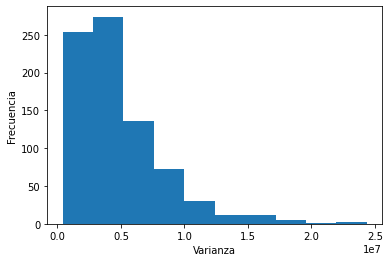

In [229]:
#OBTENEMOS LA VARIANZA DE CADA IMAGEN Y LA GUARDAMOS EN UAN LISTA PARA CONVERTIRLA EN UNA SERIE DE PANDAS
varTE=[]
for i in range(0,797):
    varimgTE = tf.image.total_variation(imagenesnpTE[i])
    SVARTE = varimgTE.numpy()
    aTE = float(SVARTE)
    varTE.append(aTE)

SVARTE = pd.Series(varTE)
print(SVARTE)
print(SVARTE.describe())
print(plt.hist(SVARTE))

plt.xlabel('Varianza')
plt.ylabel('Frecuencia')
plt.savefig('SVARTE.png')



count    1.859000e+03
mean     4.926949e+06
std      3.410050e+06
min      2.053800e+05
25%      2.426941e+06
50%      3.975081e+06
75%      6.475688e+06
max      2.702974e+07
dtype: float64


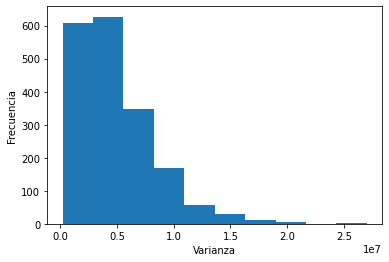

In [228]:
varTR=[]
for i in range(0,len(imagenesnpTR)-1):
    varimgTR = tf.image.total_variation(imagenesnpTR[i])
    SVARTR = varimgTR.numpy()
    aTR = float(SVARTR)
    varTR.append(aTR)

SVARTR = pd.Series(varTR)
print(SVARTR.describe())
plt.hist(SVARTR)
plt.xlabel('Varianza')
plt.ylabel('Frecuencia')
plt.savefig('SVARTR.png')

In [13]:
#VERIFICAMOS QUE TODAS LAS IMÁGENES HAYAN QUEDADO EN LA MISMA RESOLUCIÖN Y CON LOS MISMOS CANALES
x=0
for i in imagenesnpTR:
    row,col,cha = i.shape
    if row!=250 or col!=250 or cha !=3:
        print(i.shape)
        print(x)
        x+=1

z=0
for i in imagenesnpTE:
    row,col,cha = i.shape
    if row!=250 or col!=250 or cha !=3:
        print(i.shape)
        print(z)
        z+=1

print(x)
print(z)

0
0


In [14]:
ARRAYTE = np.array(imagenesnpTE)
ARRAYTR = np.array(imagenesnpTR)

cid
QmYUepWppJ39WdCt5exfj3RLcHLttBHqR57ssfw5DcbseZ    100.0
Name: price, dtype: float64


title                                         Newbie Necromancy
name                                       The ring of Eleadrus
creator                                          rubenalexander
art_series    rubenalexander_newbie-necromancy_the-ring-of-e...
price                                                     100.0
symbol                                                SWAP.HIVE
type                                                      PHOTO
likes                                                         0
nsfw                                                      False
tokens                                                        3
year                                                       2020
rights                                                        1
royalty                                                       0
path          ./dataset/image/QmYUepWppJ39WdCt5exfj3RLcHLttB...
id               QmYUepWppJ39WdCt5exfj3RLcHLttBHqR57ssfw5DcbseZ
Name: QmYUepWppJ39WdCt5exfj3RLcHLttBHqR5

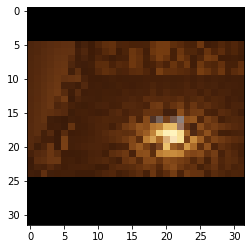

In [25]:
plt.imshow(ARRAYTE[100])
print(marcasTE[100])
fotos_test.iloc[100]

In [21]:
#Estandarizar los datos
ARRAYTE_est =ARRAYTE/255
ARRAYTR_est =ARRAYTR/255



(1860, 250, 250, 3)

In [16]:
marcasTE_est=np.asarray(marcasTE)
marcasTE_est=marcasTE_est/350
marcasTR_est=np.asarray(marcasTR)
marcasTR_est=marcasTR_est/350

In [92]:
len(np.unique(marcasTR_est))


(798, 250, 250, 3)

In [231]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256, 3), kernel_initializer= 'he_normal'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((3,3)))

model.add(layers.Conv2D(32, (3,3), activation='relu',kernel_initializer= 'he_normal'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3,3)))

model.add(layers.Conv2D(64, (3,3), activation='relu',kernel_initializer= 'he_normal'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3,3)))

model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer= 'he_normal'))
model.add(layers.BatchNormalization())

model.summary()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_initializer= 'he_normal'))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer= 'he_normal'))
model.summary()
model.compile(optimizer='adam',
          loss=tf.keras.losses.MeanSquaredError(),
          metrics=['MAE','MSE'])

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_308 (Conv2D)         (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d_252 (MaxPooli  (None, 82, 82, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_309 (Conv2D)         (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_253 (MaxPooli  (None, 26, 26, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_310 (Conv2D)         (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_254 (MaxPooli  (None, 8, 8, 64)       

In [234]:
history = model.fit(ARRAYTR_est, marcasTR_est, epochs=5)

Epoch 1/5
59/59 [==============================] - 43s 715ms/step - loss: 0.0366 - MAE: 0.1434 - MSE: 0.0366
Epoch 2/5
59/59 [==============================] - 26s 447ms/step - loss: 0.0330 - MAE: 0.1347 - MSE: 0.0330
Epoch 3/5
59/59 [==============================] - 26s 448ms/step - loss: 0.0312 - MAE: 0.1308 - MSE: 0.0312
Epoch 4/5
59/59 [==============================] - 29s 489ms/step - loss: 0.0248 - MAE: 0.1144 - MSE: 0.0248
Epoch 5/5
59/59 [==============================] - 31s 519ms/step - loss: 0.0196 - MAE: 0.1014 - MSE: 0.0196


25/25 - 4s - loss: 0.0527 - MAE: 0.1666 - MSE: 0.0527 - 4s/epoch - 158ms/step
0.22956860670021015
0.16664205491542816


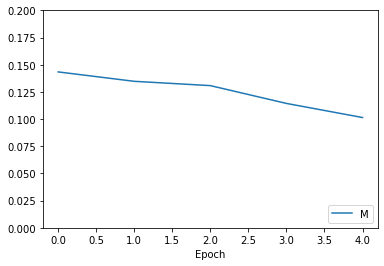

In [235]:
plt.plot(history.history['MAE'], label='MAE')
#plt.plot(history.history['val_MAE'], label = 'MAE')
plt.xlabel('Epoch')
plt.ylim([0, 0.2])
plt.legend('MAE training',loc='lower right')


test_loss, test_MAE, test_MSE = model.evaluate(ARRAYTE_est,  marcasTE_est, verbose=2)
test_RMSE=test_MSE**0.5
print(test_RMSE)
print(test_MAE)

plt.savefig('MAE4.png')

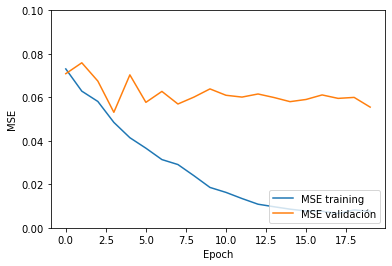

In [162]:
plt.plot(history.history['MSE'], label='MSE')
#plt.plot(history.history['val_MSE'], label = 'MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim([0, 0.1])
plt.legend('MSE training', loc='lower right')

plt.savefig('MSE3.png')


In [22]:
#Modelos alternativos
marcasTR_est2 = np.reshape(marcasTR_est,-1) #Se convierte Y en un vector de 1 dimensión
marcasTE_est2 = np.reshape(marcasTE_est,-1)

old_shapeTE = ARRAYTE_est.shape
old_shapeTR = ARRAYTR_est.shape
new_shapeTE = old_shapeTE[1] * old_shapeTE[2] * old_shapeTE[3]
new_shapeTR = old_shapeTR[1] * old_shapeTR[2] * old_shapeTR[3]

ARRAYTE_estn=ARRAYTE_est.reshape(old_shapeTE[0], new_shapeTE)
ARRAYTR_estn=ARRAYTR_est.reshape(old_shapeTR[0],new_shapeTR)

#clf.fit(ARRAYTR_est,marcasTR_est2) #Se ajusta el modelo utilizando las caracteristicas contenidas en X, x1 y x2,
# y los resultados en Y (0 rojo y 1 Azul)#

In [106]:
#Regresión lineal
from sklearn.linear_model import LinearRegression
clf=LinearRegression() #Se define cls como un modelo logistico con semilla=911}
clf.fit(ARRAYTR_estn,marcasTR_est2) #Se ajusta el modelo utilizando las caracteristicas contenidas en X, x1 y x2,
# y los resultados en Y (0 rojo y 1 Azul)#
marcas_hat=clf.predict(ARRAYTE_estn)

#Evaluacion
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print(rmse(marcas_hat,marcasTE_est2))

def mae(predictions, targets):
    return np.absolute(predictions - targets).mean()

print(mae(marcas_hat,marcasTE_est2))

marcas_hat

0.26216918349525514
0.19754390418889628


array([ 3.72703589e-01,  1.52422452e-01,  2.96046390e-01,  2.43644690e-01,
       -2.01706118e-01,  1.23623371e-01,  1.07002152e-01,  4.01006578e-02,
        5.02920511e-01,  1.00821839e-01,  1.19113646e-01,  2.03976850e-01,
        1.74369250e-01,  3.56845882e-01,  2.56201473e-01,  2.52166605e-01,
        1.59831266e-01,  2.08372147e-01,  9.36338674e-02, -1.86447833e-02,
        2.27499286e-01,  5.08884999e-01, -2.86427912e-02,  2.30083339e-01,
        1.84715721e-01,  1.02737404e-01,  5.05251260e-04, -5.15099040e-02,
        1.54586488e-01,  1.73620430e-01,  3.83748413e-01,  4.40280031e-01,
        1.71995699e-01, -2.51934295e-02,  3.23852561e-02,  7.29223426e-01,
        2.14845082e-01,  1.46856087e-01,  2.71407669e-02,  2.31728501e-01,
        4.50531768e-01,  3.54791721e-01,  1.80168445e-01,  1.98864082e-01,
        1.61311828e-01,  3.09721101e-01, -1.53082410e-01,  4.15637861e-01,
        4.44585259e-01,  2.33290305e-03, -3.12155340e-01,  1.02073239e-01,
        4.09921107e-01,  

In [156]:
#Regresión lasso
from sklearn import linear_model
clf=linear_model.Lasso(alpha=0.1) #Se define cls como un modelo logistico con semilla=911}
clf.fit(ARRAYTR_estn,marcasTR_est2) #Se ajusta el modelo utilizando las caracteristicas contenidas en X, x1 y x2,
# y los resultados en Y (0 rojo y 1 Azul)#

#Evaluacion
marcas_hat=clf.predict(ARRAYTE_estn)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print(rmse(marcas_hat,marcasTE_est2))

def mae(predictions, targets):
    return np.absolute(predictions - targets).mean()

print(mae(marcas_hat,marcasTE_est2))





0.21803554535895972
0.16326309107263504


In [52]:
#Aleatoridad
from random import choices

marcas_hat  = choices(marcasTE_est2, k=798) #f
marcas_hat=np.asarray(marcas_hat)
print(marcas_hat.shape)
print(marcasTE_est2.shape)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def mae(predictions, targets):
    return np.absolute(predictions - targets).mean()


print(rmse(marcas_hat,marcasTE_est2))
print(mae(marcas_hat,marcasTE_est2))


it_accu=[]
it_accu2=[]
for i in range(0,10000):
    marcas_hat  = choices(marcasTE_est, k=798) #f
    marcas_hat=np.asarray(marcas_hat)
    it_accu.append(rmse(marcas_hat,marcasTE_est))
    it_accu2.append(mae(marcas_hat,marcasTE_est))


len(it_accu)
print(sum(it_accu)/10000)
print(sum(it_accu2)/10000)



(798,)
(798,)
0.30309073270446296
0.21733527733619762
0.30774441788124546
0.22053043119707708
